# Polymer deck

Comment:  
The fluid properties are at reservoir conditions. For the recovery factor this is not an issue. However, for the water cut one needs to be a bit more careful.
One has the following relation between the fractional water flow at reservoir and surface conditions:
$$
\begin{align}
f_w &= \dfrac{q_w}{q_w+q_o} \\
f_{ws} &= \dfrac{q_w/B_w}{q_w/B_w + q_o/B_o} \\
f_{ws} & = \dfrac{1}{1+\frac{B_w}{B_o}\left(\frac{1}{f_w}-1\right)}
\end{align}
$$
This correction is not in the code!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import polymer_util as pu

# Input parameters

## Parametrization
The following parametrizations are used for the input paramters:
* Corey parametrization for the relative permeabilities:  
  $$
  \begin{align}
  k_{rw}(S_w) & = k^e_{rw} S^{n_w} \\
  k_{ro}(S_w) & = k^e_{ro} (1-S)^{n_o}
  \end{align}
  $$
  with $S = \dfrac{(S_w-S_{cw})}{(1-S_{cw}-S_{orw})}$  
* Viscosity of polymer solution is given by: 
  $$
  \mu(C) = \mu_w \left( 1 + \dfrac{(\mu_p -\mu_w)}{\mu_w} C \right)
  $$
  where $\mu_w$ is the water viscosity and $\mu_p$ the polymer solution viscosity at injection concentration.
* Langmuir isotherm for the polymer adsorption:
  $$
  a(C) = \dfrac{\text{ad}_1 C}{1+\text{ad}_2 C}
  $$

## Conditions on the parameters
For the relative permeabilities we require:
$$
k^e_{rw}, k^e_{ro} > 0 \\
n_w, n_o \geq 1 \\
0 < S_{cw} < 1-S_{orw}< 1 \\
$$
The solution in this code has only been tested for Corey exponents in the above range, not investigated what happens for smaller exponents.  
The following condition on the polymer viscosity ensures that $\partial f_w / \partial C < 0$ which is used in the construction of the solution:
$$
\mu_w \leq \mu_p
$$
If adsorption is included, the solution requires $\frac{da}{dC} >0$ and $\frac{d^2a}{dC^2} <0$ which implies:
$$
\text{ad}_1 > 0 \\
\text{ad}_2 > 0
$$
Without adsorption: $\text{ad}_1 = 0$, no requirement on $\text{ad}_2$.

In [5]:
phi = 0.2
rho_s = 2500 # rock density in kg/m3
rho_w = 1000 # water density in kg/m3
Cinj  = 0.25 # wt% polymer in water
Cs = 40 # adsorption on rock in micro gram / g rock
Dads = (1.0-phi)/phi * rho_s/rho_w * (Cs*1e-6)/(Cinj*0.01)
print(f'Dads = {Dads:6.2f}')
# With the adsorption parameters below the polymer model will replicate the standard MOC solution
ad1 = 2.0*Dads
ad2 = 1.0

# The viscosities are input in cP. However, the model is independent of the unit, as long as all the
# viscosities are specified in the same unit.
params = { 'krwe': 0.3, 'nw': 2.0, 'Scw': 0.1,
           'kroe': 1.0, 'no': 3.0, 'Sorw': 0.1,
           'muo': 2.0, 'muw': 0.5, 'mup': 2.0,
           'ad1': ad1, 'ad2': ad2 }

ff = pu.FracFlow(params_dict = params)

Dads =   0.16


Swi = 0.2000, lowSwi = True
Sw1 = 0.7230
Sw2 = 0.4997
lamS(Sw=Sw1,C=1) = 1.0689
C-wave shock speed (Sw1,C=1)->(Sw2,C=0) = 1.0689
S-wave shock speed = 2.2619


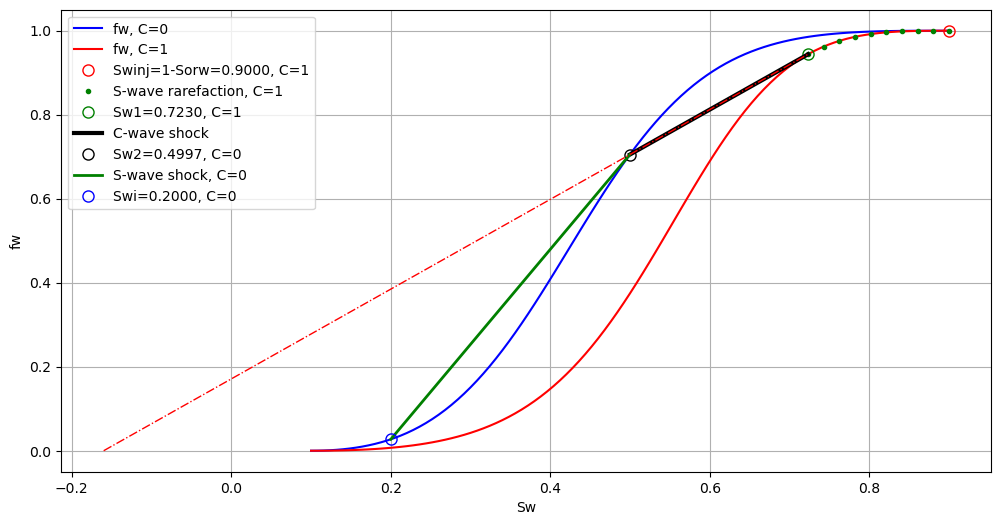

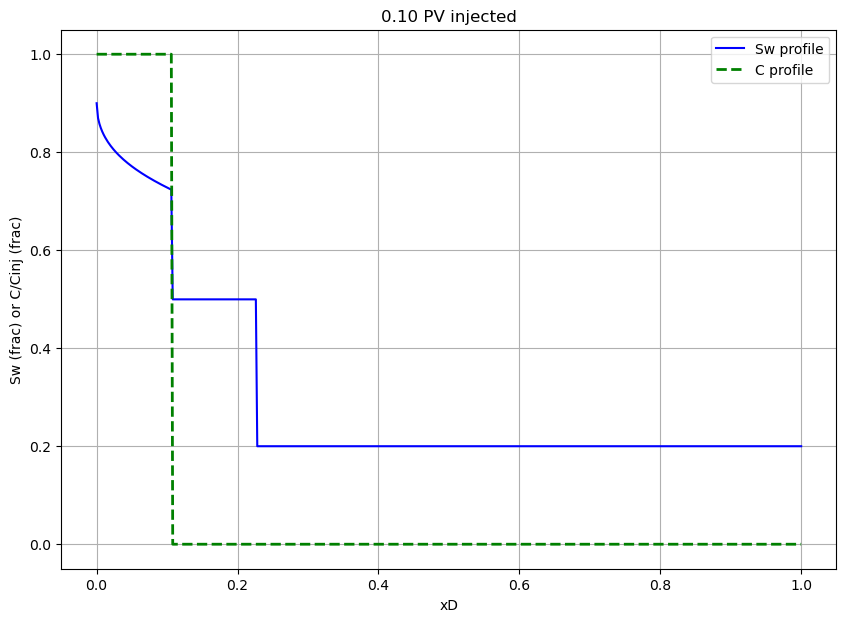

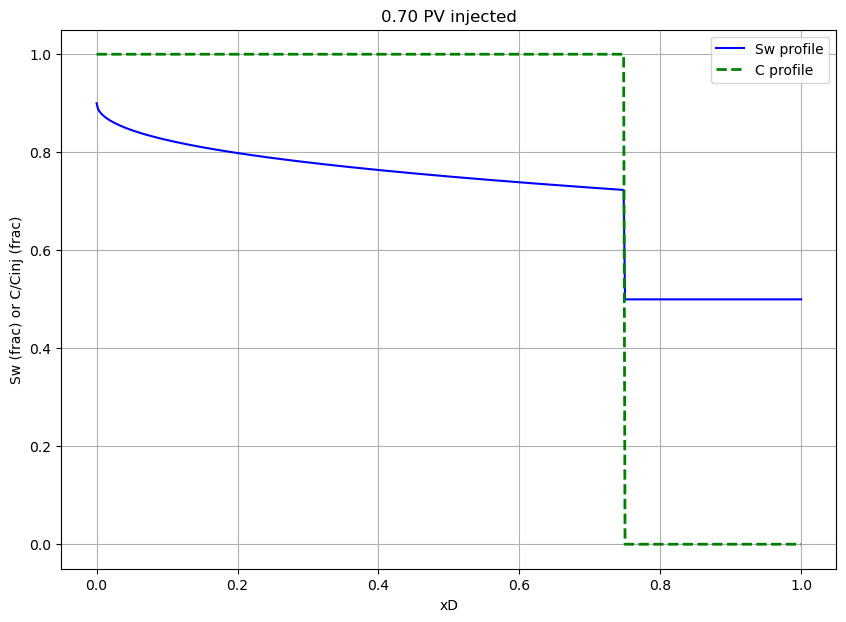

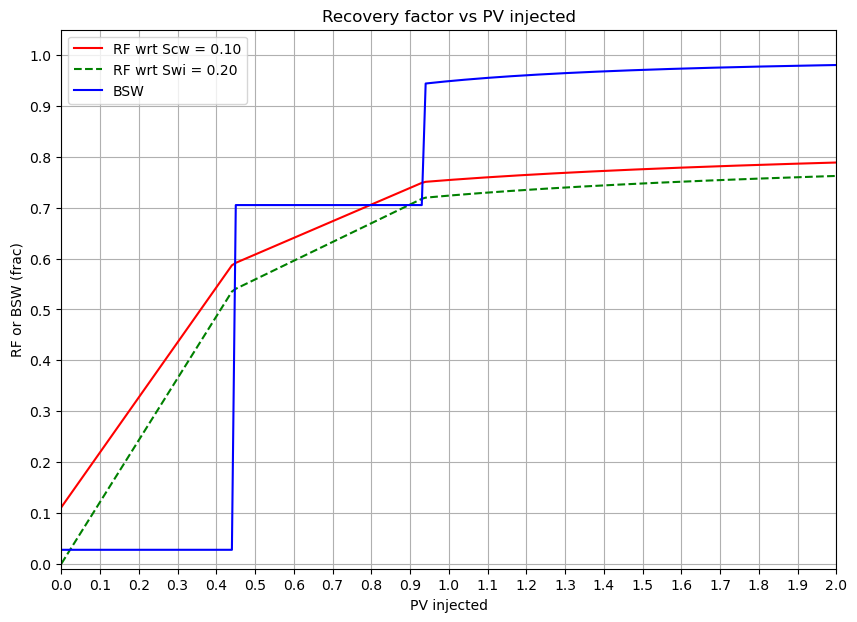

In [6]:
# For Swi=Scw it is not really required to set Swi, as this is the default
# Swi, lowSwi = ff.set_Swi(ff.Scw) 
Swi, lowSwi = ff.set_Swi(0.2) 
print(f'Swi ={Swi: 6.4f}, lowSwi = {lowSwi}')

figsol, axsol = ff.plot_solution()

data, dataC, figprf, axprf = ff.plot_profile([0.1,0.7], ns=501, sizex=10, sizey=7)

RF_Scw, RF_Swim, BSW, figRF, axRF = ff.plot_RF()
figRF.set_figheight(7)
figRF.set_figwidth(10)
axRF.set_xlim(0,2)
axRF.set_xticks(np.arange(0,2.05,0.1)); # This semicolon suppresses output from this command
